<a href="https://colab.research.google.com/github/GauraoM/ML-Basics-Definitions/blob/main/Outlier_detection_%26_removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("/content/bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [ ]:
min_thresold, max_thresold = df['price_per_sqft'].quantile([0.001,0.999])
min_thresold, max_thresold 

(1366.184, 50959.36200000098)

In [ ]:
df2 = df[(df.price_per_sqft<max_thresold) & (df.price_per_sqft>min_thresold)]
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


#### 4 standard deviation to remove outliers 

In [ ]:
df2.price_per_sqft.mean(), df2.price_per_sqft.std()

(6663.6537351958705, 4141.020700174605)

In [ ]:
upper_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
lower_limit = df2.price_per_sqft.mean() -4* df2.price_per_sqft.std()

In [ ]:
df2[(df2.price_per_sqft>upper_limit) | (df2.price_per_sqft<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [ ]:
df3 = df2[(df2.price_per_sqft<upper_limit) & (df2.price_per_sqft>lower_limit)]
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


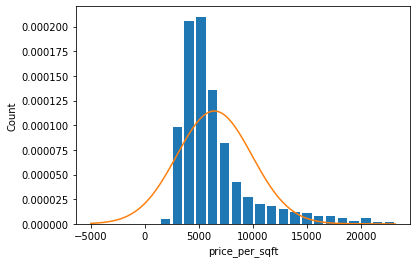

In [ ]:
# Plot the histogram
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel("price_per_sqft")
plt.ylabel("Count")

rng = np.arange(-5000,df3.price_per_sqft.max(),100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

#### Remove outliers using Z-Score

In [ ]:
df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df2.price_per_sqft.std() 
df2.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
4166,Raja Rajeshwari Nagar,2 BHK,1128.0,2.0,48.79,2,4325,-0.564753
12832,Hebbal,3 BHK,1662.0,3.0,155.00,3,9326,0.642920
11865,BEML Layout,3 BHK,2000.0,3.0,85.00,3,4250,-0.582864
8444,other,3 BHK,1950.0,3.0,230.00,3,11794,1.238909
8637,EPIP Zone,3 BHK,2350.0,4.0,163.00,3,6936,0.065768
8420,other,3 BHK,1365.0,3.0,54.00,3,3956,-0.653861
8313,other,3 BHK,1350.0,3.0,81.00,3,6000,-0.160263
3924,Green Glen Layout,3 BHK,1725.0,3.0,130.00,3,7536,0.210660
11316,other,3 BHK,2400.0,2.0,50.00,3,2083,-1.106165
11369,Kudlu Gate,3 BHK,1850.0,3.0,110.00,3,5945,-0.173545


In [ ]:
df2[df2.zscore>4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [ ]:
df2[df2.zscore<-4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore


In [ ]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967
